# **STUDENT EXAM DATASET ANALYSIS**

_INTRODUCTION_

c

 **DATA OVERVIEW**

The student exam dataset contains raw data on student performance in various exams. Below is a description of each columns in the dataset:
*Student ID* : A unique identifier assigned to each student.
*Age* : The age of the student.
*Gender* : The gender of the student.
*Class* : The class or grade level the student is in.
*Math Score* : The score student achieved in mathematics exam.
*English Score* : The score student achieved in English exam.
*Computer Score*: The score student achieved in computer exam.
*Sport Score* : The score student achieved in sport or physical education.
*Attendance Score* :  A score refelecting the student's attendance record.
*Art Score* : The score student achieved in art subject exam.
*Total Score* : Aggregate score across all subjects.
*Average Score* : the average score across all subjects.
*Grade* : The final grade assigned to the student based on total score.
*NOTE*: The dataset has not undergone any data cleaning, so it may contain missig values, inconsistencies, or errors that need to be addressed before accurate analysis can be performed.
*Data Source* : Kaggle/student_exam_dataset_with_issues (link: https://www.kaggle.com/datasets/dinachanthan/student-exam-dataset-with-issues

In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [2]:
#Load data
ExamData = pd.read_csv('student_data_with_issues.csv')

#view data
ExamData.head()

,Student ID,Age,Gender,Class,Math Score,English Score,Computer Score,Sport Score,Attendance Score,Art Score,Total Score,Average Score,Grade
0,StudentA001,18,Male,A,98.0,95.0,99.0,91.0,94.89,90.0,NaN,NaN,NaN
1,StudentA002,14,Female,D,48.0,73.0,86.0,21.0,82.32,36.0,NaN,NaN,NaN
2,StudentA003,14,Female,B,86.0,NaN,56.0,6.0,96.82,4.0,NaN,NaN,NaN
3,StudentA004,14,Male,A,80.0,65.0,95.0,87.0,94.84,65.0,NaN,NaN,NaN
4,StudentA005,15,NaN,A,NaN,46.0,13.0,10.0,57.31,99.0,NaN,NaN,NaN


 **DATA EXPLORATION**

Purpose: To understand dataset structure, examine its datatypes, identify missing values and duplicates.

In [3]:
#check data structure
ExamData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student ID        100 non-null    object 
 1   Age               85 non-null     object 
 2   Gender            87 non-null     object 
 3   Class             88 non-null     object 
 4   Math Score        94 non-null     float64
 5   English Score     93 non-null     float64
 6   Computer Score    94 non-null     float64
 7   Sport Score       97 non-null     float64
 8   Attendance Score  96 non-null     float64
 9   Art Score         91 non-null     float64
 10  Total Score       0 non-null      float64
 11  Average Score     0 non-null      float64
 12  Grade             0 non-null      float64
dtypes: float64(9), object(4)
memory usage: 10.3+ KB


In [4]:
#Statistical summary of the data
ExamData.describe()

,Math Score,English Score,Computer Score,Sport Score,Attendance Score,Art Score,Total Score,Average Score,Grade
count,94.000000,93.000000,94.000000,97.000000,96.000000,91.000000,0.0,0.0,0.0
mean,58.191489,56.978495,66.446809,58.443299,82.683333,48.835165,NaN,NaN,NaN
std,28.949075,28.351435,31.649837,30.675034,13.450756,29.200937,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,50.750000,0.000000,NaN,NaN,NaN
25%,36.000000,42.000000,41.000000,31.000000,73.997500,22.500000,NaN,NaN,NaN
50%,68.000000,65.000000,80.500000,70.000000,85.840000,53.000000,NaN,NaN,NaN
75%,80.000000,76.000000,94.750000,87.000000,94.840000,66.500000,NaN,NaN,NaN
max,100.000000,100.000000,100.000000,99.000000,99.930000,99.000000,NaN,NaN,NaN


In [5]:
#check null count of each column
ExamData.isnull().sum()

Student ID            0
Age                  15
Gender               13
Class                12
Math Score            6
English Score         7
Computer Score        6
Sport Score           3
Attendance Score      4
Art Score             9
Total Score         100
Average Score       100
Grade               100
dtype: int64

In [6]:
#check duplicated row
ExamData[ExamData.duplicated()]

,Student ID,Age,Gender,Class,Math Score,English Score,Computer Score,Sport Score,Attendance Score,Art Score,Total Score,Average Score,Grade
68,StudentA055,NaN,Male,B,47.0,42.0,47.0,72.0,91.02,26.0,NaN,NaN,NaN
72,StudentA055,NaN,Male,B,47.0,42.0,47.0,72.0,91.02,26.0,NaN,NaN,NaN
88,StudentA055,NaN,Male,B,47.0,42.0,47.0,72.0,91.02,26.0,NaN,NaN,NaN


**DATA CLEANING**

Purpose: To handle missing values and duplicated values, and perform any necessary transformation

In [7]:
#Drop duplicate rows

ExamData.drop_duplicates(inplace = True)

In [8]:
#changing datatype 
ExamData['Gender'] = ExamData['Gender'].astype('category')
ExamData['Class'] = ExamData['Class'].astype('category')
ExamData['Age'] = pd.to_numeric(ExamData['Age'], errors = 'coerce')

In [9]:
#fill null values

ExamData['Age'].fillna(ExamData['Age'].median(), inplace = True)
ExamData['Gender'].fillna(ExamData['Gender'].mode()[0], inplace = True)
ExamData['Class'].fillna(ExamData['Class'].mode()[0], inplace = True)
ExamData['Math Score'].fillna(ExamData['Math Score'].mean(), inplace = True)
ExamData['English Score'].fillna(ExamData['English Score'].mean(), inplace = True)
ExamData['Computer Score'].fillna(ExamData['Computer Score'].mean(), inplace = True)
ExamData['Sport Score'].fillna(ExamData['Sport Score'].mean(), inplace = True)
ExamData['Attendance Score'].fillna(ExamData['Attendance Score'].mean(), inplace = True)
ExamData['Art Score'].fillna(ExamData['Art Score'].mean(), inplace = True)

In [10]:
#dropping student ID column

ExamData.drop(columns = 'Student ID', inplace = True)

In [11]:
#fill null values for total scores

ExamData['Total Score'] = ExamData[['Math Score', 'English Score', 'Computer Score', 'Sport Score', 'Attendance Score', 'Art Score']].sum(axis = 1)

#Cfill null values for average scores

ExamData['Average Score'] = ExamData['Total Score'] / 6

In [12]:
#defining function for grade input

def grade_input(average_score):
    if average_score >= 80:
        return 'A'
    elif average_score >= 70:
         return 'B'
    elif average_score >= 60:
        return 'C'
    elif average_score >= 50:
        return 'D'
    else:
        return 'F'

#applyig the function to the 'average score' column
ExamData['Grade'] = ExamData['Average Score'].apply(grade_input)

 **CLEANED DATASET VIEW**

In [13]:
ExamData.head()

,Age,Gender,Class,Math Score,English Score,Computer Score,Sport Score,Attendance Score,Art Score,Total Score,Average Score,Grade
0,18.0,Male,A,98.00000,95.000000,99.0,91.0,94.89,90.0,567.890000,94.648333,A
1,14.0,Female,D,48.00000,73.000000,86.0,21.0,82.32,36.0,346.320000,57.720000,D
2,14.0,Female,B,86.00000,57.477778,56.0,6.0,96.82,4.0,306.297778,51.049630,D
3,14.0,Male,A,80.00000,65.000000,95.0,87.0,94.84,65.0,486.840000,81.140000,A
4,15.0,Male,A,58.56044,46.000000,13.0,10.0,57.31,99.0,283.870440,47.311740,F


In [14]:
ExamData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               97 non-null     float64 
 1   Gender            97 non-null     category
 2   Class             97 non-null     category
 3   Math Score        97 non-null     float64 
 4   English Score     97 non-null     float64 
 5   Computer Score    97 non-null     float64 
 6   Sport Score       97 non-null     float64 
 7   Attendance Score  97 non-null     float64 
 8   Art Score         97 non-null     float64 
 9   Total Score       97 non-null     float64 
 10  Average Score     97 non-null     float64 
 11  Grade             97 non-null     object  
dtypes: category(2), float64(9), object(1)
memory usage: 8.8+ KB


In [15]:
ExamData.describe()

,Age,Math Score,English Score,Computer Score,Sport Score,Attendance Score,Art Score,Total Score,Average Score
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,16.000000,58.560440,57.477778,67.087912,58.010638,82.414409,49.613636,373.164813,62.194135
std,1.346291,28.422119,27.623672,30.954822,30.578279,13.296476,27.974107,92.458586,15.409764
min,14.000000,0.000000,0.000000,0.000000,0.000000,50.750000,0.000000,214.537778,35.756296
25%,15.000000,36.000000,42.000000,44.000000,31.000000,74.000000,23.000000,297.510000,49.585000
50%,16.000000,68.000000,65.000000,79.000000,65.000000,82.810000,51.000000,363.197778,60.532963
75%,17.000000,80.000000,75.000000,94.000000,87.000000,94.840000,65.000000,447.947912,74.657985
max,18.000000,100.000000,100.000000,100.000000,99.000000,99.930000,99.000000,592.900000,98.816667


In [16]:
#save the cleaned data
ExamData.to_csv('cleaned_student_data.csv', index = False)

**FEATURE ENGINEERING**

Purpose: To create additional features to facilitate visualization and enhance analysis 

In [17]:
#grouping attendance
ExamData['Attendance Group'] = pd.cut(ExamData['Attendance Score'], bins = 3, right = True)
print (ExamData['Attendance Group'])

0      (83.537, 99.93]
1     (67.143, 83.537]
2      (83.537, 99.93]
3      (83.537, 99.93]
4     (50.701, 67.143]
            ...       
95    (67.143, 83.537]
96    (67.143, 83.537]
97     (83.537, 99.93]
98    (50.701, 67.143]
99    (50.701, 67.143]
Name: Attendance Group, Length: 97, dtype: category
Categories (3, interval[float64, right]): [(50.701, 67.143] < (67.143, 83.537] < (83.537, 99.93]]


In [18]:
ExamData['Attendance Group2'] = pd.cut(ExamData['Attendance Score'], bins = 3, labels = ['low', 'Medium', 'High'], right = True)
print (ExamData['Attendance Group2'])

0       High
1     Medium
2       High
3       High
4        low
       ...  
95    Medium
96    Medium
97      High
98       low
99       low
Name: Attendance Group2, Length: 97, dtype: category
Categories (3, object): ['low' < 'Medium' < 'High']


 **EXPLORATORY DATA ANALYSIS**

Purpose: To visualize the data to gain insight into students performance.

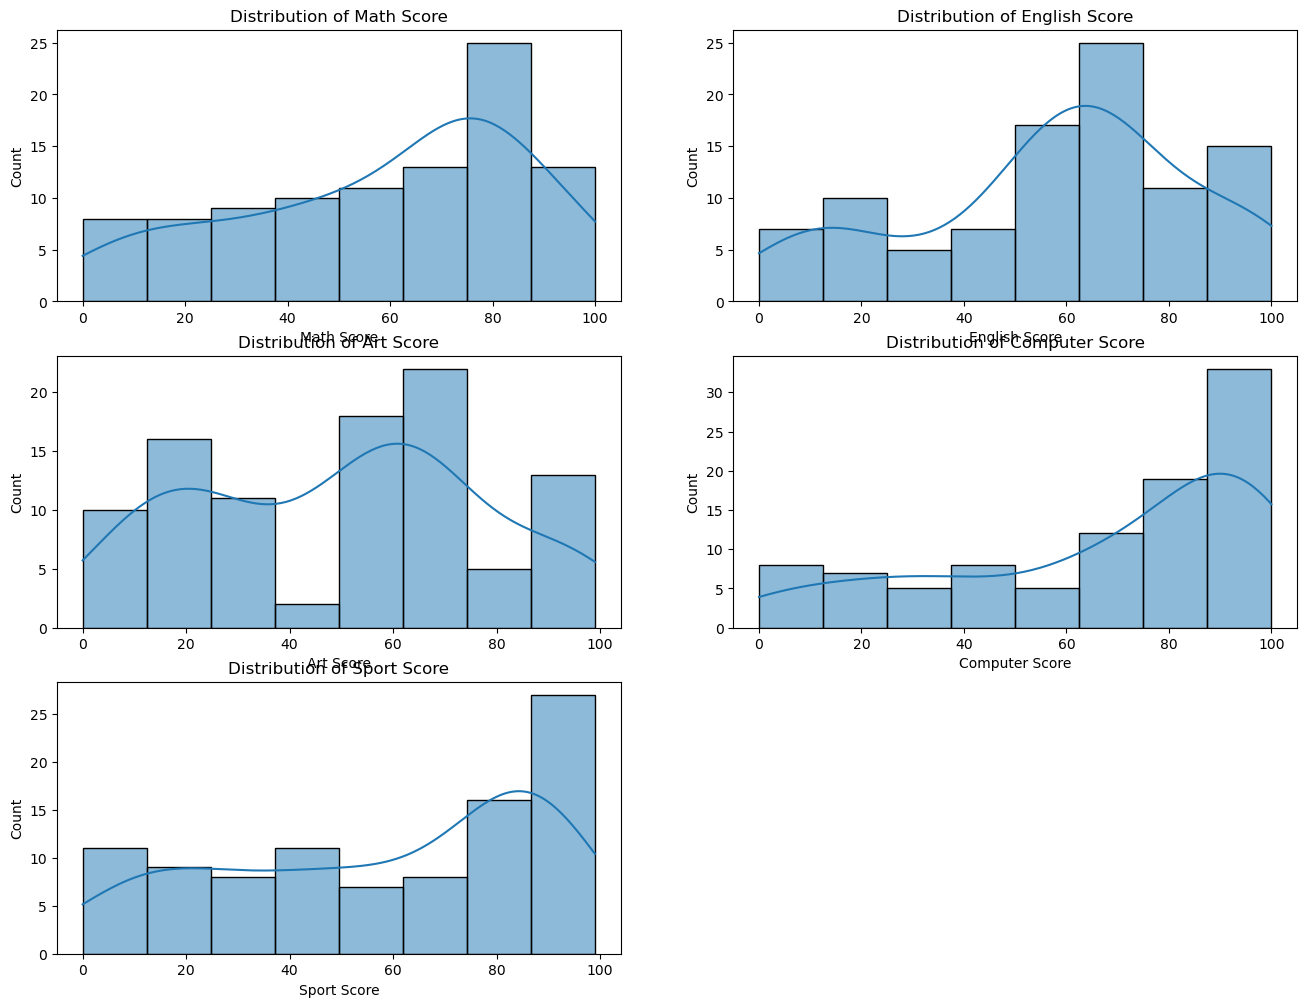

In [19]:
#distribution of subject score - histplot with kde
scores = ['Math Score', 'English Score', 'Art Score', 'Computer Score', 'Sport Score']
plt.figure(figsize =(16,12))
for i, score in enumerate(scores):
    plt.subplot(3, 2, i+1)
    sns.histplot(data = ExamData, x = score, kde = True)
    plt.title(f'Distribution of {score}')
plt.tight_layout
plt.savefig(f'Distribution of {score}')
plt.show()

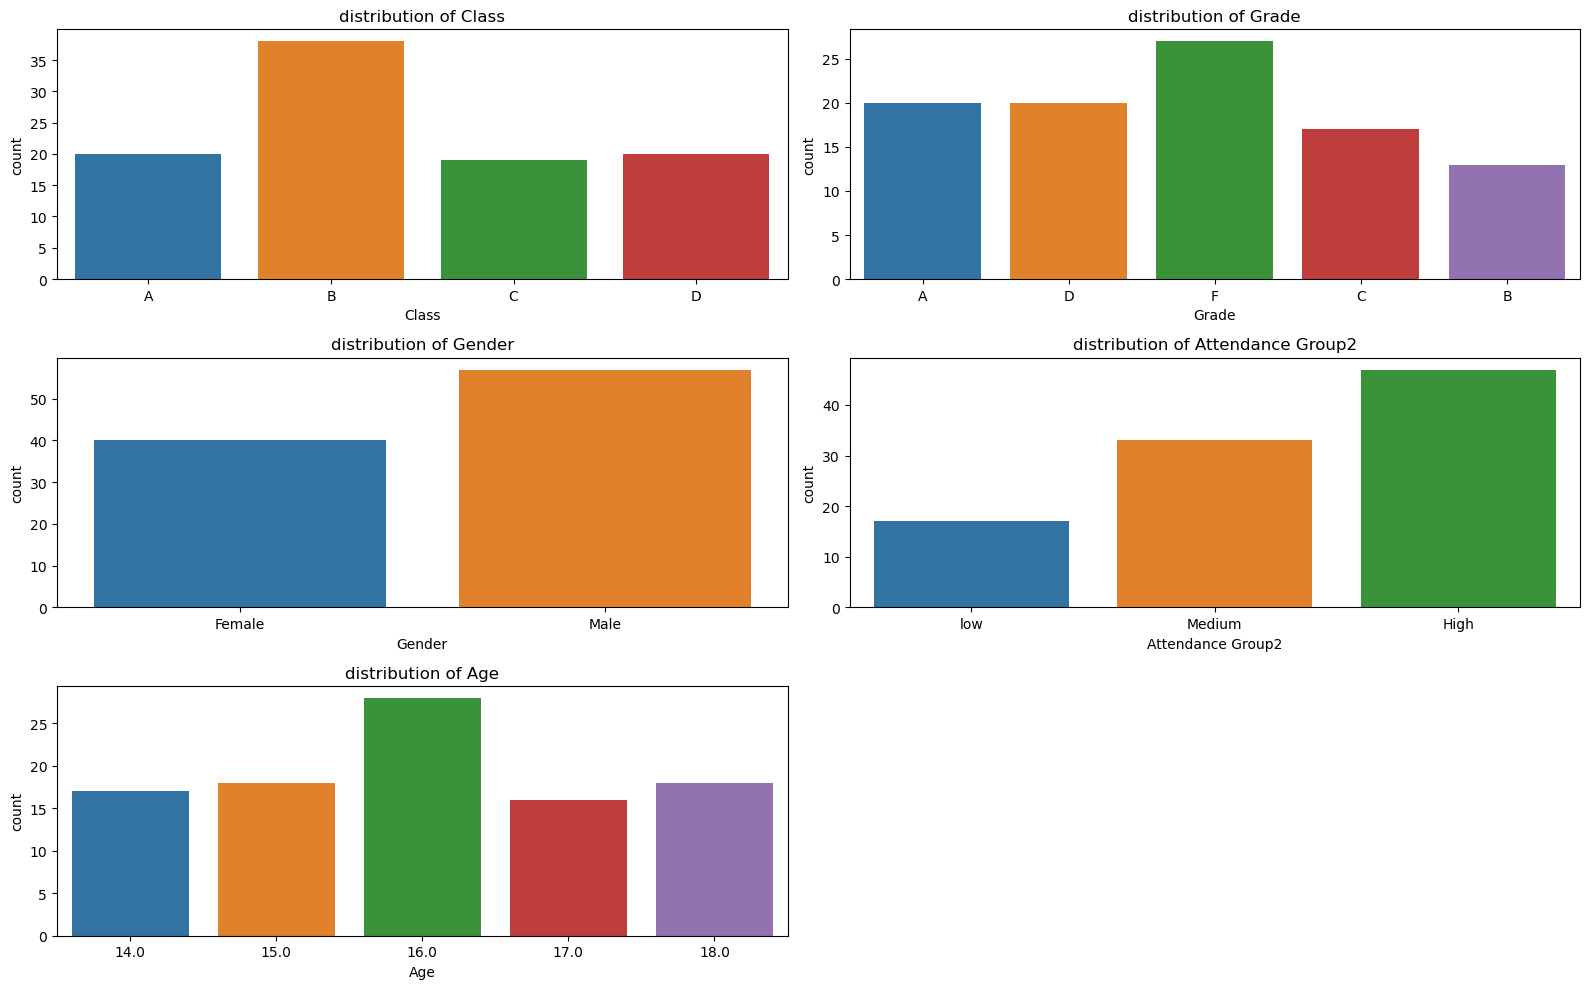

In [30]:
##distribution of caegorical data - countplot
labels = ['Class', 'Grade', 'Gender', 'Attendance Group2', 'Age']
plt.figure(figsize=(16, 10))
for i, label in enumerate(labels):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x= label, data = ExamData)
    plt.title(f'distribution of {label}')
plt.tight_layout()
plt.savefig(f'distribution of {label}')
plt.show()

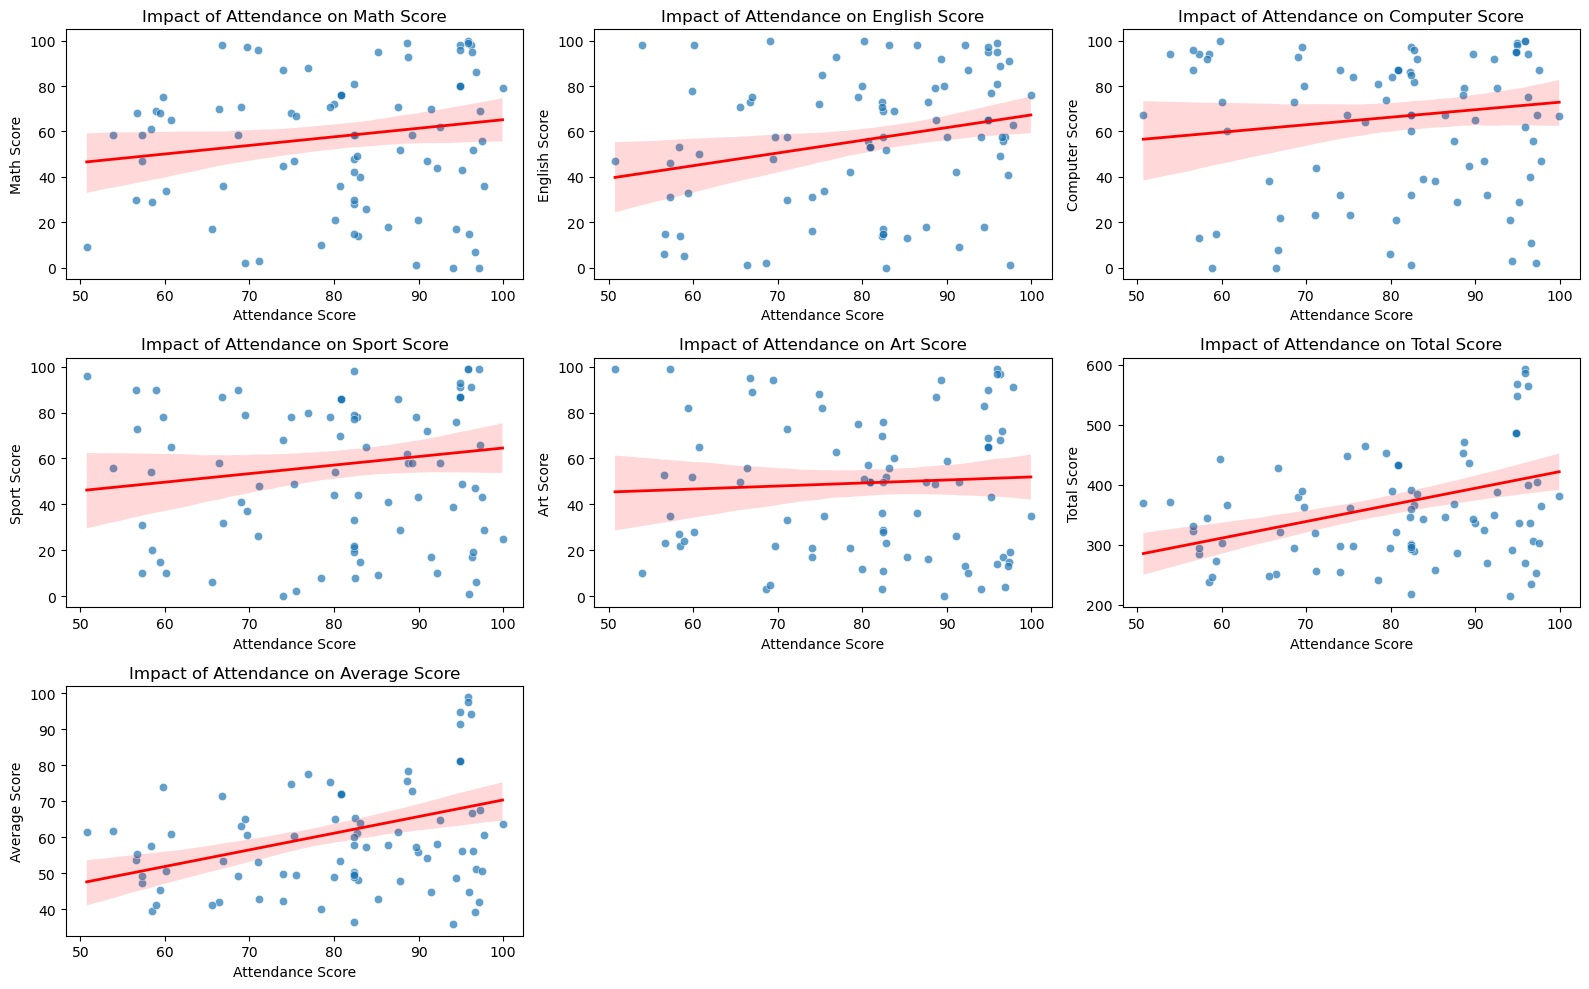

In [21]:
# attendance score by subject score - Scatter plot with regression line
plt.figure(figsize=(16, 10))
subjects_with_total_avg = ['Math Score', 'English Score', 'Computer Score', 'Sport Score', 'Art Score', 'Total Score', 'Average Score']
for i, subject in enumerate(subjects_with_total_avg):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x='Attendance Score', y=subject, data=ExamData, alpha=0.7)
    sns.regplot(x='Attendance Score', y=subject, data=ExamData, scatter=False, color='red', line_kws={"lw":2})
    plt.title(f'Impact of Attendance on {subject}')
    plt.ylabel(subject)
    plt.xlabel('Attendance Score')
plt.tight_layout()
plt.savefig(f'Impact of Attendance on {subject}')
plt.show()

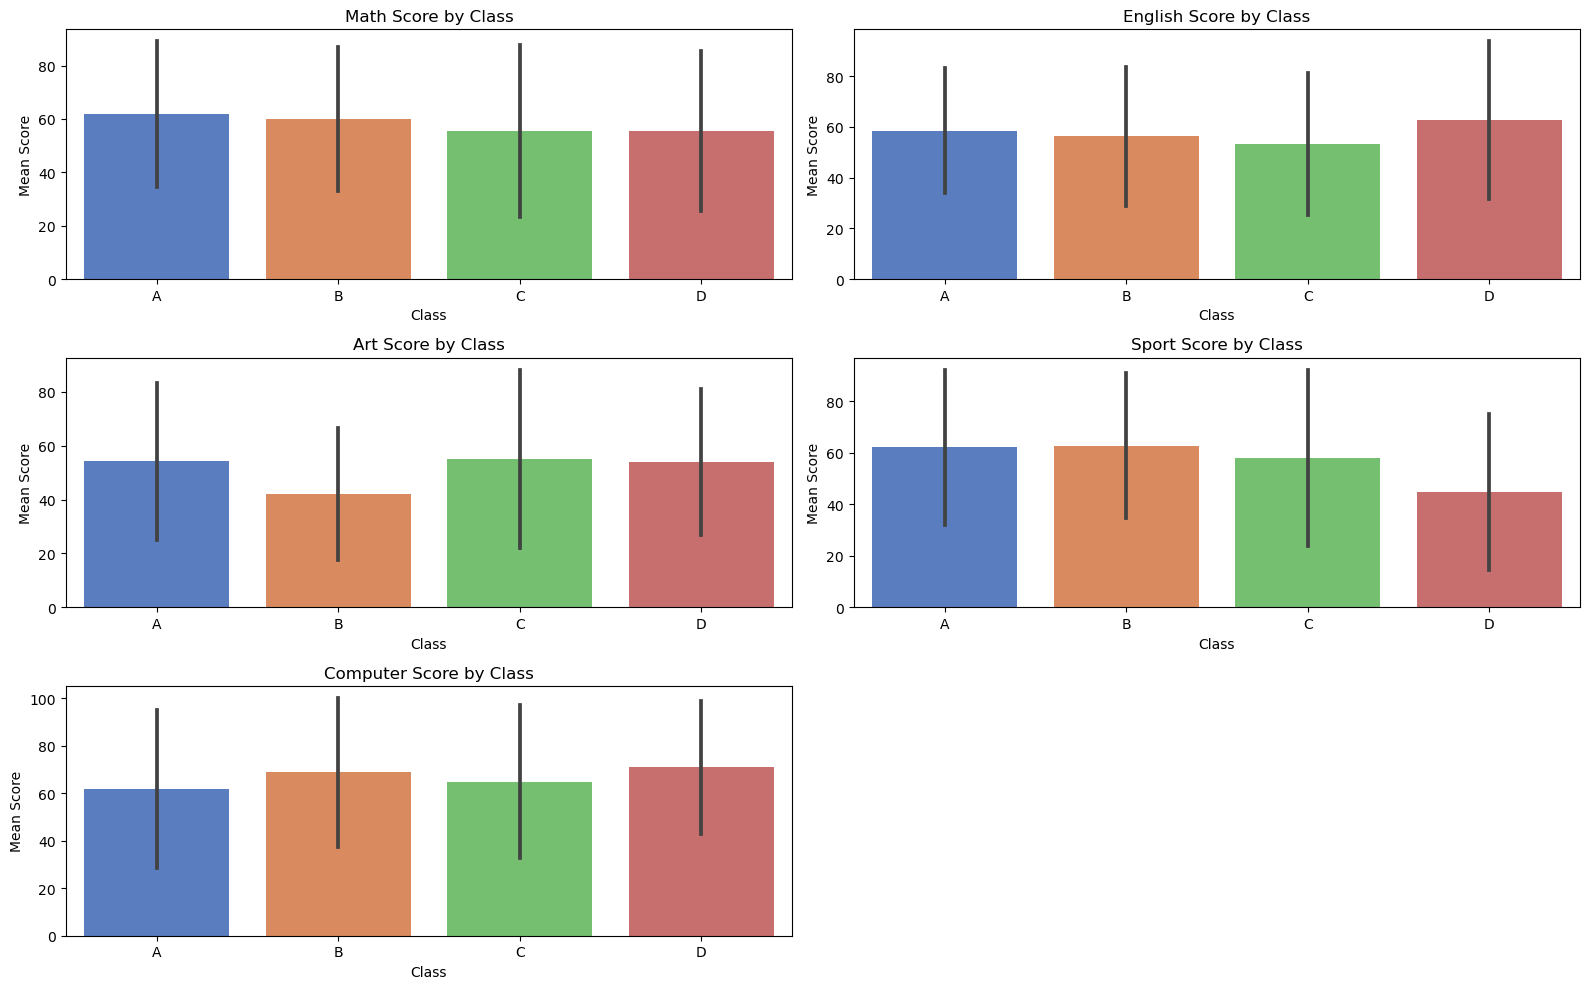

In [23]:
#subject score by class distribution - Bar Plot with error bars
subjects = ['Math Score', 'English Score', 'Art Score', 'Sport Score', 'Computer Score']
plt.figure(figsize=(16, 10))
for i, subject in enumerate(subjects):
    plt.subplot(3, 2, i + 1)
    sns.barplot(x='Class', y=subject, data=ExamData, ci='sd', palette='muted')
    plt.title(f'{subject} by Class')
    plt.ylabel('Mean Score')
    plt.xlabel('Class')
plt.tight_layout()
plt.savefig(f'{subject} by Class')
plt.show()

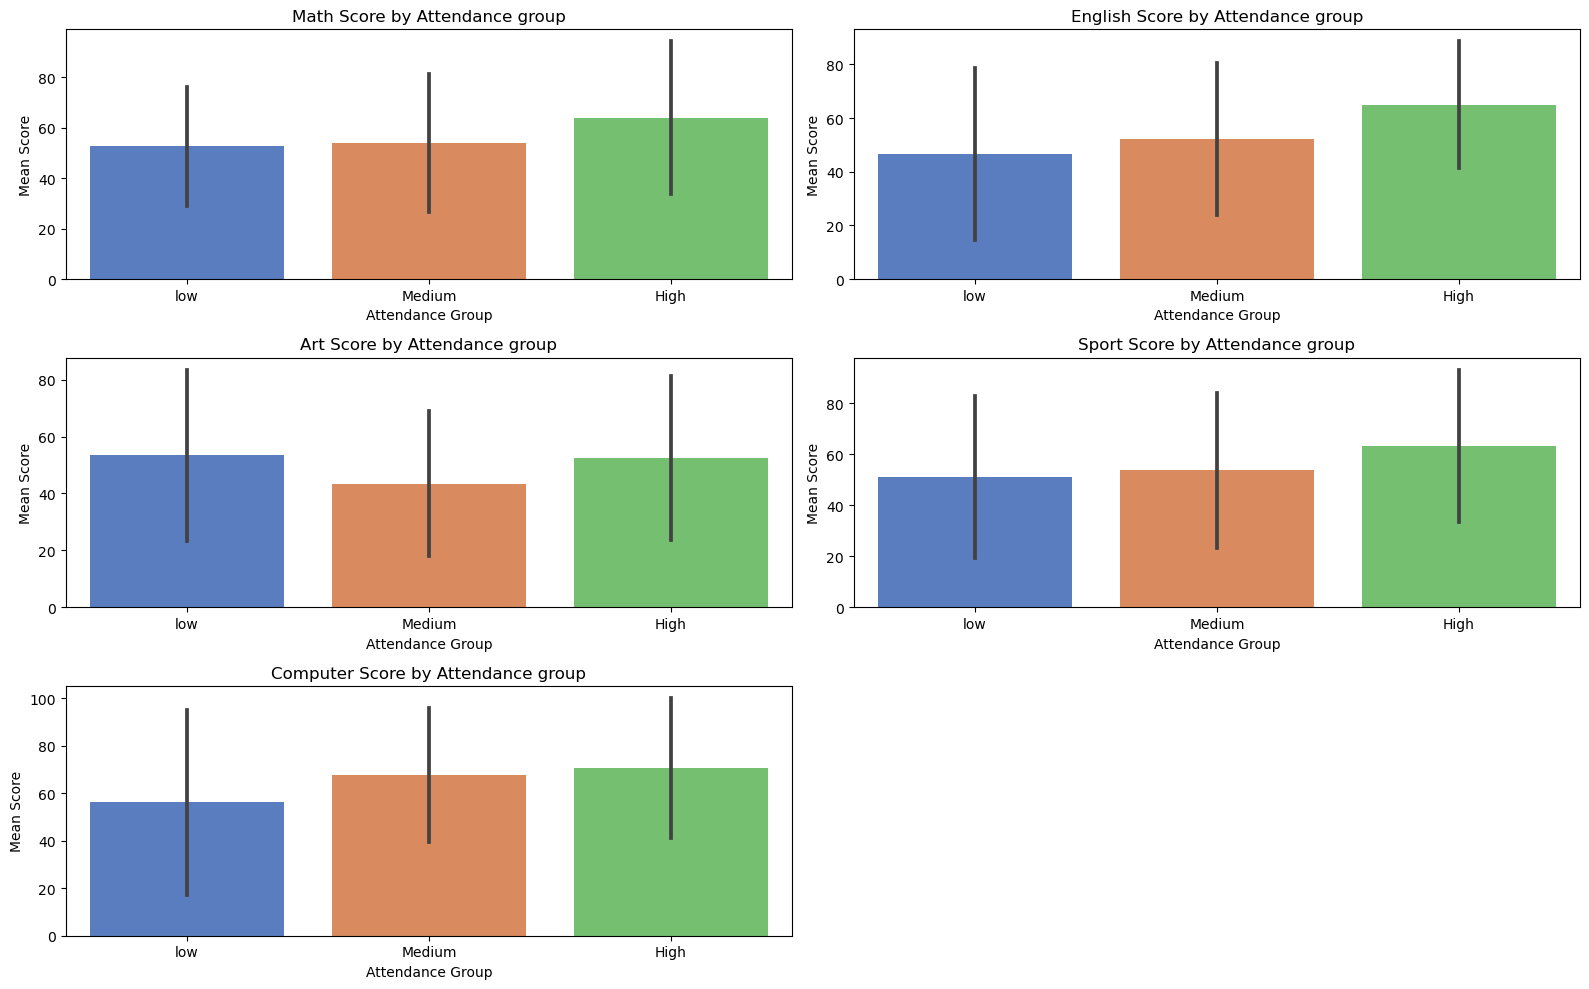

In [26]:
#sunject score y attendance group - Bar plot iwth error bars
plt.figure(figsize=(16, 10))
for i, subject in enumerate(subjects):
    plt.subplot(3, 2, i + 1)
    sns.barplot(x='Attendance Group2', y=subject, data=ExamData, ci='sd', palette='muted')
    plt.title(f'{subject} by Attendance group')
    plt.ylabel('Mean Score')
    plt.xlabel('Attendance Group')
plt.tight_layout()
plt.savefig(f'{subject} by Attendance group')
plt.show()

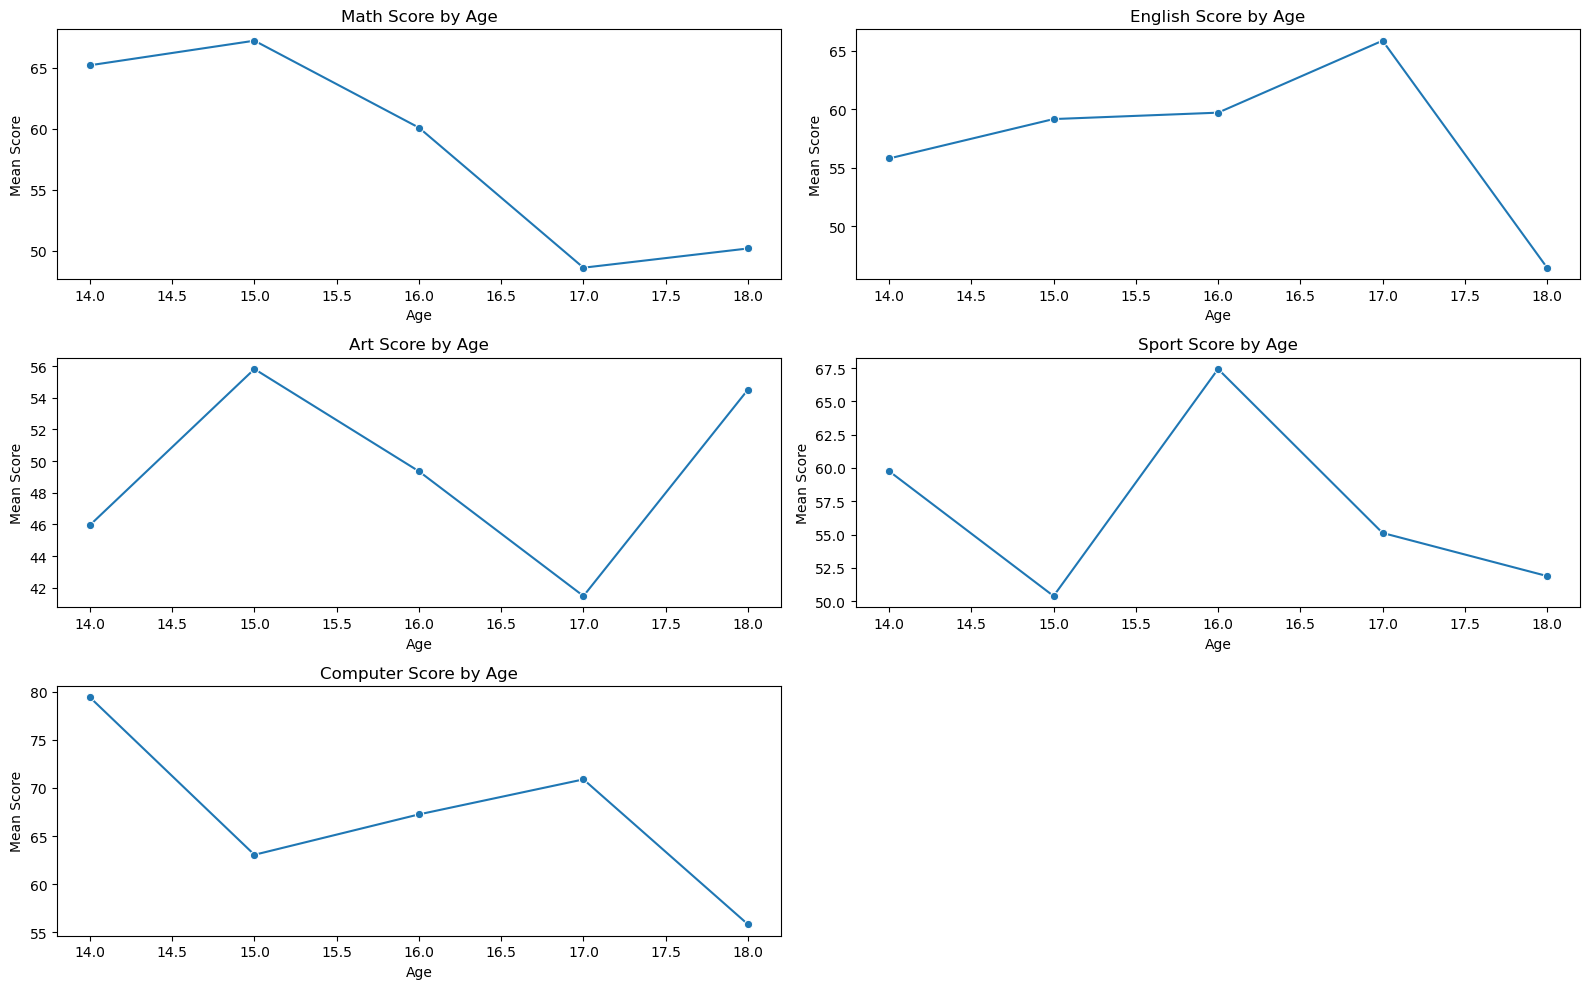

In [27]:
# scores grouped by age - Line Plot with marker
plt.figure(figsize=(16, 10))
for i, subject in enumerate(subjects):
    plt.subplot(3, 2, i + 1)
    sns.lineplot(x='Age', y=subject, data=ExamData, marker='o', ci=None, palette='dark')
    plt.title(f'{subject} by Age')
    plt.ylabel('Mean Score')
    plt.xlabel('Age')
plt.tight_layout()
plt.savefig(f'{subject} by Age')
plt.show()

 **CORRELATION ANALYSIS**

 Purpose : To identify any relationship between different numerical variables  

In [ ]:
#encode categorical data
encode = LabelEncoder()
ExamData['gender'] = encode.fit_transform(ExamData['Gender'])
ExamData['class'] = encode.fit_transform(ExamData['Class'])

In [ ]:
#correlation matrix 1
columns = ExamData[['gender', 'class', 'Math Score', 'English Score', 'Computer Score', 'Sport Score', 'Art Score', 'Attendance Score', 'Age']]
corr_matrix = columns.corr()
corr_matrix

In [ ]:
#visualize correlation matrix result using heatmap
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation matrix')
plt.show()

In [ ]:
#correlation matrix 2 with total score and average score
corr_matrix2 = ExamData[['Total Score', 'Average Score', 'Math Score', 'English Score', 'Computer Score', 'Sport Score', 'Art Score', 'Attendance Score']].corr()
corr_matrix2

In [ ]:
##visualize correlation matrix result using heatmap
sns.heatmap(corr_matrix2, annot = True, cmap ='viridis')
plt.title('correlation between Total_average score and subject score')
plt.savefig('correlation between Total_average score and subject score')
plt.show()

**PREDICTIVE MODELLING**

Purpose: To build a predictive model to estimate grade on various features

In [ ]:
#defining features (x) and target (y)
x = ExamData[['Total Score', 'Average Score', 'Math Score', 'English Score', 'Art Score', 'Attendance Score', 'Computer Score', 'Sport Score', 'Age', 'gender', 'class']]
y = ExamData['Grade']

In [ ]:
#splitting data into training data (70%) and testing data (30%)
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
#training data using RandomForestClassifier
model = RandomForestClassifier() 

model.fit(x_train, y_train)

In [ ]:
#testing data
y_pred = model.predict(x_test)
y_pred

In [ ]:
#Evaluate model's performnace with classiification report
print (classification_report(y_pred, y_test))

In [ ]:
#splitting and training data with cross validation scores 
model_c = RandomForestClassifier(random_state = 42)
cv_scores = cross_val_score(model_c, x, y, cv =5, scoring = 'accuracy')
print(cv_scores)

In [ ]:
print(cv_scores.mean())

**Model Testing on Unseen Data**

In [ ]:
#creating new data

newExamData = pd.DataFrame({
    'Age': [16,18, 15, 14],
    'class': [0,3, 2, 1],
    'gender': [1,0, 1, 0],
    'Math Score': [99,65, 90, 67],
    'English Score': [78,15, 90, 89],
    'Computer Score': [34, 27, 95, 98],
    'Art Score': [17, 80, 97, 70],
    'Attendance Score': [50, 76, 85, 54],
    'Sport Score': [43, 35, 90, 78]
})

newExamData['Total Score'] = newExamData[['Math Score', 'English Score', 'Art Score', 'Attendance Score', 'Computer Score', 'Sport Score']].sum(axis = 1)
newExamData['Average Score'] = newExamData['Total Score'] / 6 

newExamData

In [ ]:
#defining features (x)
x_new =  newExamData[['Total Score', 'Average Score', 'Math Score', 'English Score', 'Art Score', 'Attendance Score', 'Computer Score', 'Sport Score', 'Age', 'gender', 'class']]

In [ ]:
#predicting traget ( y = Grade)
y_new_pred = model.predict(x_new)

print(y_new_pred)